In [ ]:
import pandas as pd

# Load the dataset
file_path = 'PS206767-553247439.csv'
data = pd.read_csv(file_path)

# Display basic info about the dataset
data_info = data.info()
data_head = data.head()

# Check for missing values
missing_values = data.isnull().sum()

data_info, data_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 78 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PharmGKB Subject ID                                                   5700 non-null   object 
 1   PharmGKB Sample ID                                                    5700 non-null   object 
 2   Project Site                                                          5700 non-null   float64
 3   Gender                                                                5696 non-null   object 
 4   Race (Reported)                                                       5194 non-null   object 
 5   Race (OMB)                                                            5700 non-null   object 
 6   Ethnicity (Reported)                                                  4461 non-null   object 
 7

(None,
   PharmGKB Subject ID PharmGKB Sample ID  Project Site  Gender  \
 0         PA135312261        PA135312629           1.0    male   
 1         PA135312262        PA135312630           1.0  female   
 2         PA135312263        PA135312631           1.0  female   
 3         PA135312264        PA135312632           1.0    male   
 4         PA135312265        PA135312633           1.0    male   
 
   Race (Reported) Race (OMB)    Ethnicity (Reported)         Ethnicity (OMB)  \
 0           White      White  not Hispanic or Latino  not Hispanic or Latino   
 1           White      White  not Hispanic or Latino  not Hispanic or Latino   
 2           White      White  not Hispanic or Latino  not Hispanic or Latino   
 3           White      White  not Hispanic or Latino  not Hispanic or Latino   
 4           White      White  not Hispanic or Latino  not Hispanic or Latino   
 
        Age  Height (cm)  ...  Unnamed: 68 Unnamed: 69 Unnamed: 70  \
 0  60 - 69       193.04  ...  

In [ ]:
# Step 1: Drop empty columns
columns_to_drop = [col for col in data.columns if data[col].isnull().all()]
cleaned_data = data.drop(columns=columns_to_drop)

# Step 2: Handle missing values for critical variables
# Impute continuous variables with median and categorical variables with mode
critical_continuous_vars = ['Height (cm)', 'Weight (kg)', 'Therapeutic Dose of Warfarin']
critical_categorical_vars = ['Race (OMB)', 'Gender']

for col in critical_continuous_vars:
    cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)

for col in critical_categorical_vars:
    cleaned_data[col].fillna(cleaned_data[col].mode()[0], inplace=True)

# Step 3: Normalize continuous variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cleaned_data[critical_continuous_vars] = scaler.fit_transform(cleaned_data[critical_continuous_vars])

# Step 4: Encode categorical variables
encoded_data = pd.get_dummies(cleaned_data, columns=critical_categorical_vars, drop_first=True)

# Check the cleaned dataset and summary statistics
cleaned_data_info = cleaned_data.info()
cleaned_data_summary = cleaned_data.describe()

cleaned_data_info, cleaned_data_summary


<ipython-input-2-4d8bca5e609e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data[col].fillna(cleaned_data[col].median(), inplace=True)
<ipython-input-2-4d8bca5e609e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6161 entries, 0 to 6160
Data columns (total 68 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PharmGKB Subject ID                                                   5700 non-null   object 
 1   PharmGKB Sample ID                                                    5700 non-null   object 
 2   Project Site                                                          5700 non-null   float64
 3   Gender                                                                6161 non-null   object 
 4   Race (Reported)                                                       5194 non-null   object 
 5   Race (OMB)                                                            6161 non-null   object 
 6   Ethnicity (Reported)                                                  4461 non-null   object 
 7

(None,
        Project Site  Height (cm)  Weight (kg)     Diabetes  \
 count   5700.000000  6161.000000  6161.000000  3283.000000   
 mean       9.555965     0.558700     0.228727     0.187024   
 std        6.340864     0.121055     0.098753     0.389990   
 min        1.000000     0.000000     0.000000     0.000000   
 25%        4.000000     0.487992     0.163698     0.000000   
 50%        8.000000     0.557186     0.216659     0.000000   
 75%       15.000000     0.623134     0.274434     0.000000   
 max       21.000000     1.000000     1.000000     1.000000   
 
        Congestive Heart Failure and/or Cardiomyopathy  Valve Replacement  \
 count                                     4012.000000        3958.000000   
 mean                                         0.183699           0.256443   
 std                                          0.387287           0.436724   
 min                                          0.000000           0.000000   
 25%                                   

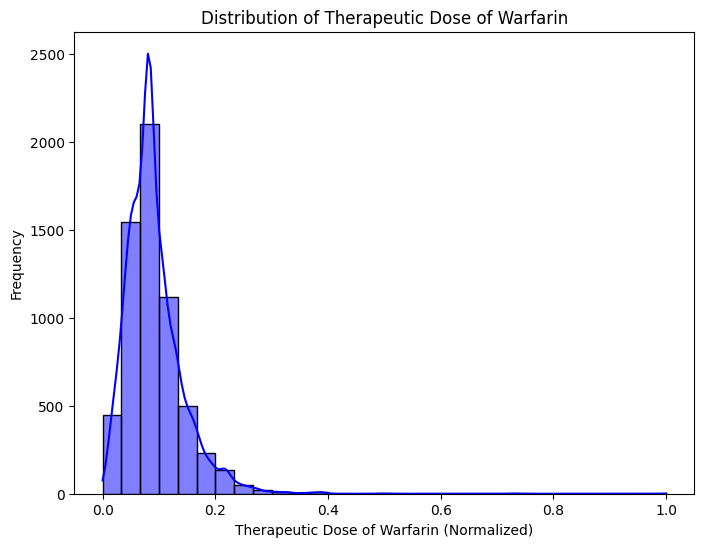

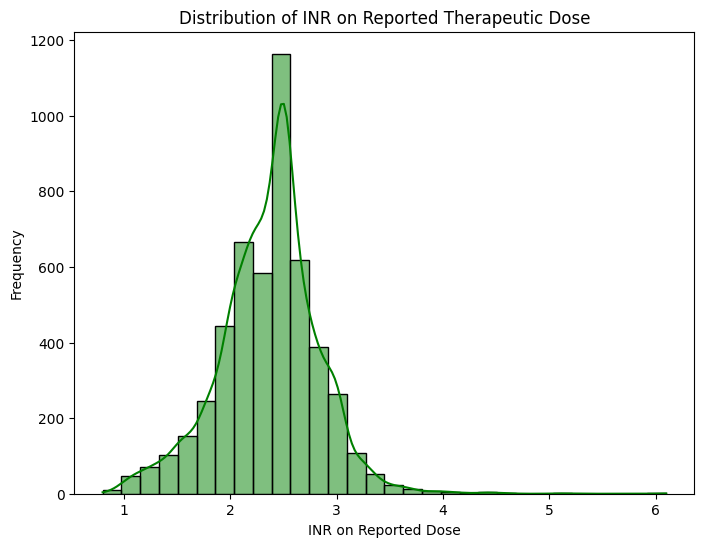

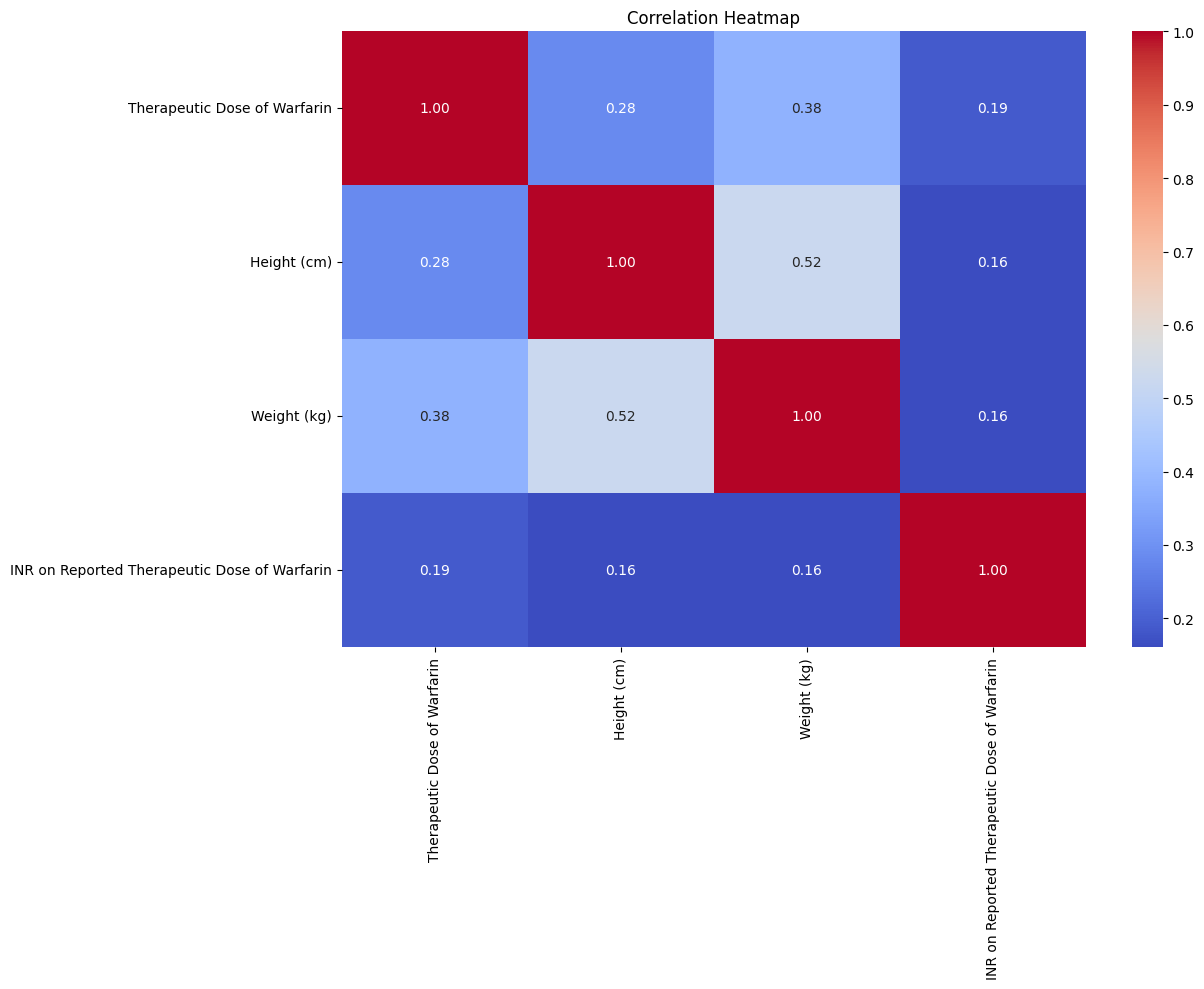

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Distribution of Therapeutic Dose of Warfarin
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['Therapeutic Dose of Warfarin'], kde=True, bins=30, color='blue')
plt.title('Distribution of Therapeutic Dose of Warfarin')
plt.xlabel('Therapeutic Dose of Warfarin (Normalized)')
plt.ylabel('Frequency')
plt.show()

# Step 2: Distribution of INR on Reported Therapeutic Dose
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['INR on Reported Therapeutic Dose of Warfarin'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of INR on Reported Therapeutic Dose')
plt.xlabel('INR on Reported Dose')
plt.ylabel('Frequency')
plt.show()

# Step 3: Correlation Heatmap for Continuous Variables
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_data[['Therapeutic Dose of Warfarin', 'Height (cm)', 'Weight (kg)',
                                   'INR on Reported Therapeutic Dose of Warfarin']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


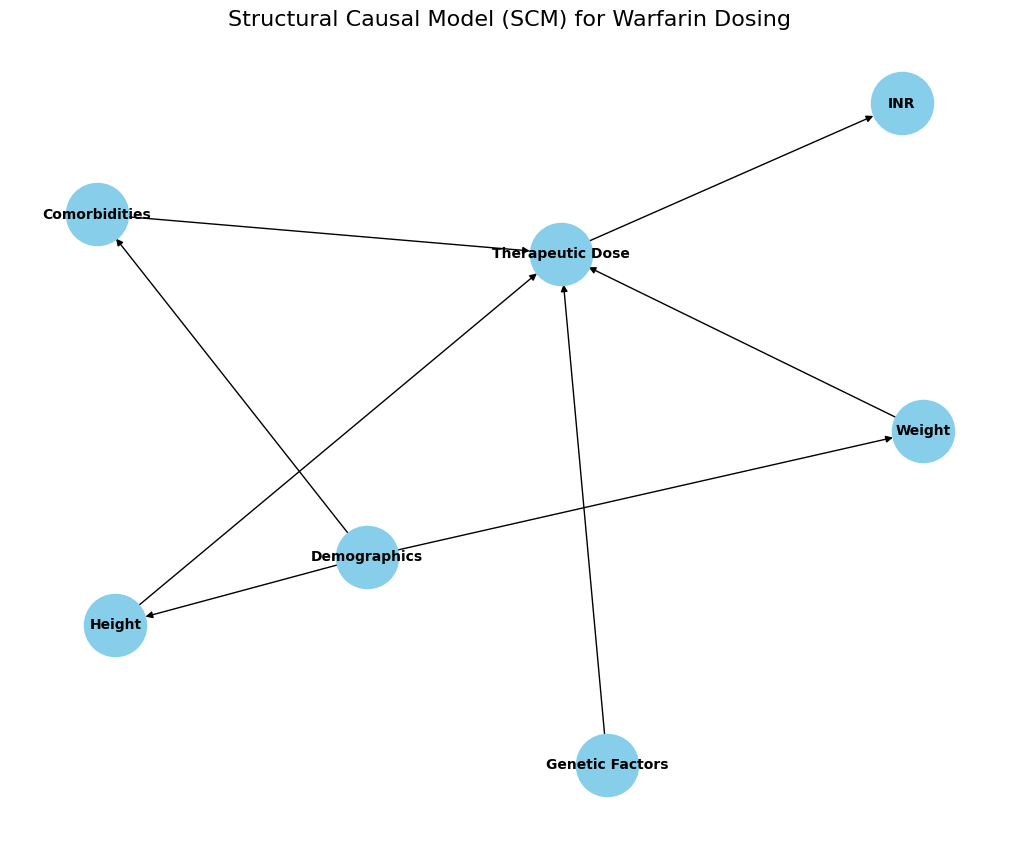

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

# Step 1: Define the SCM structure using a directed graph
scm_graph = nx.DiGraph()

# Adding nodes (variables)
variables = ['Therapeutic Dose', 'INR', 'Weight', 'Height', 'Genetic Factors', 'Comorbidities', 'Demographics']
scm_graph.add_nodes_from(variables)

# Adding edges (causal relationships)
edges = [
    ('Demographics', 'Weight'),
    ('Demographics', 'Height'),
    ('Demographics', 'Comorbidities'),
    ('Weight', 'Therapeutic Dose'),
    ('Height', 'Therapeutic Dose'),
    ('Genetic Factors', 'Therapeutic Dose'),
    ('Comorbidities', 'Therapeutic Dose'),
    ('Therapeutic Dose', 'INR')
]
scm_graph.add_edges_from(edges)

# Step 2: Visualize the SCM graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(scm_graph)
nx.draw(scm_graph, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', font_size=10, font_weight='bold')
plt.title("Structural Causal Model (SCM) for Warfarin Dosing", fontsize=16)
plt.show()


In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


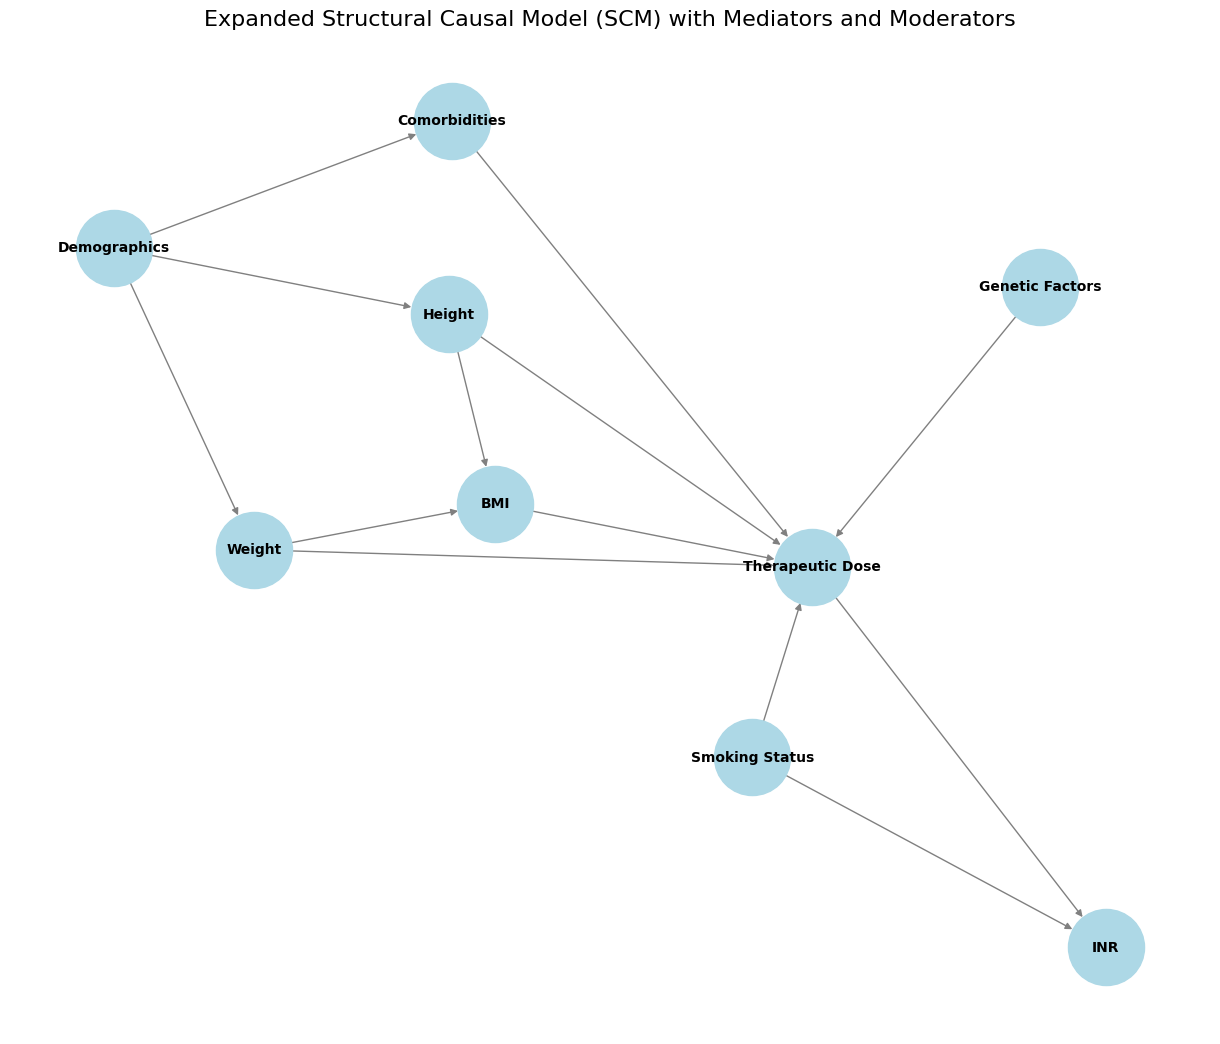

In [ ]:
# Step 1: Add BMI and Smoking Status to the SCM
# Calculate BMI as Weight (kg) / (Height (m)^2) using normalized values
cleaned_data['BMI'] = (cleaned_data['Weight (kg)'] / (cleaned_data['Height (cm)'] ** 2)) * 10000

# Add BMI and Smoking to the SCM
scm_graph.add_nodes_from(['BMI', 'Smoking Status'])
scm_graph.add_edges_from([
    ('Weight', 'BMI'),  # Weight affects BMI
    ('Height', 'BMI'),  # Height affects BMI
    ('BMI', 'Therapeutic Dose'),  # BMI influences dosage
    ('Smoking Status', 'Therapeutic Dose'),  # Smoking affects metabolism and dose
    ('Smoking Status', 'INR')  # Smoking may directly affect INR
])

# Visualize the updated SCM graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(scm_graph, seed=42)
nx.draw(scm_graph, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Expanded Structural Causal Model (SCM) with Mediators and Moderators", fontsize=16)
plt.show()

# # Step 2: Perform d-separation check for independence assumptions
# # Example: Checking if INR is independent of Demographics given Therapeutic Dose
# from dowhy.utils.graph_operations import d_separation

# # Convert the SCM graph into a format compatible with dowhy
# import networkx as nx
# from dowhy.utils.api import CausalGraph
# causal_graph = CausalGraph(scm_graph)

# # Test d-separation assumptions (example query)
# is_independent = causal_graph.is_d_separated('Demographics', 'INR', {'Therapeutic Dose'})
# is_independent


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency, pearsonr
from sklearn.linear_model import LinearRegression

# Example 1: Validate INR independence from demographics given therapeutic dose
# Regress INR on Therapeutic Dose
inr_column = 'INR on Reported Therapeutic Dose of Warfarin'
dose_column = 'Therapeutic Dose of Warfarin'
demographic_column = 'Race (OMB)'  # Example demographic column

# Ensure no missing values for regression
subset_data = cleaned_data[[inr_column, dose_column, demographic_column]].dropna()
X = subset_data[[dose_column]]
y = subset_data[inr_column]

# Perform regression
model = LinearRegression()
model.fit(X, y)
residuals = y - model.predict(X)

# Check correlation between residuals and demographic encoding
subset_data[demographic_column] = subset_data[demographic_column].astype('category').cat.codes
corr_res_demographics, p_val_demographics = pearsonr(residuals, subset_data[demographic_column])

# Example 2: Test smoking status independence from genetic factors
smoking_column = 'Current Smoker'
genetic_column = 'VKORC1 -1639 consensus'
# Ensure valid data
contingency_table = pd.crosstab(cleaned_data[smoking_column], cleaned_data[genetic_column])
chi2_stat, p_val_chi2, dof, expected = chi2_contingency(contingency_table, correction=False)

# # Example 3: Validate correlation between BMI and therapeutic dose
# corr_bmi_dose, p_val_bmi_dose = pearsonr(cleaned_data['BMI'], cleaned_data[dose_column])

# # Results summary
# (corr_res_demographics, p_val_demographics, chi2_stat, p_val_chi2, corr_bmi_dose, p_val_bmi_dose)


In [ ]:
# Step 1: Clean the data for BMI and Therapeutic Dose
bmi_dose_data = cleaned_data[['BMI', dose_column]].dropna()
bmi_values = bmi_dose_data['BMI']
dose_values = bmi_dose_data[dose_column]

# Step 1: Filter out non-finite values for BMI and Therapeutic Dose
bmi_dose_data_cleaned = bmi_dose_data[np.isfinite(bmi_dose_data['BMI']) & np.isfinite(bmi_dose_data[dose_column])]
bmi_values_cleaned = bmi_dose_data_cleaned['BMI']
dose_values_cleaned = bmi_dose_data_cleaned[dose_column]

# Retry Pearson correlation for BMI and Therapeutic Dose
corr_bmi_dose, p_val_bmi_dose = pearsonr(bmi_values_cleaned, dose_values_cleaned)

# Step 2: Filter out non-finite values for INR and demographic regression
subset_data_cleaned = subset_data[np.isfinite(subset_data[inr_column]) & np.isfinite(subset_data[dose_column])]
X_cleaned = subset_data_cleaned[[dose_column]]
y_cleaned = subset_data_cleaned[inr_column]

# Perform regression
model.fit(X_cleaned, y_cleaned)
residuals_cleaned = y_cleaned - model.predict(X_cleaned)

# Check correlation between residuals and demographic encoding
corr_res_demographics, p_val_demographics = pearsonr(residuals_cleaned, subset_data_cleaned[demographic_column])

# Results summary
(corr_res_demographics, p_val_demographics, chi2_stat, p_val_chi2, corr_bmi_dose, p_val_bmi_dose)


(0.30988854466910193, 4.911688478244571e-111, 10.054566054546603, 0.006556600496963051, -0.0021386 ↪

↪ 95459407797, 0.8667224746162985)

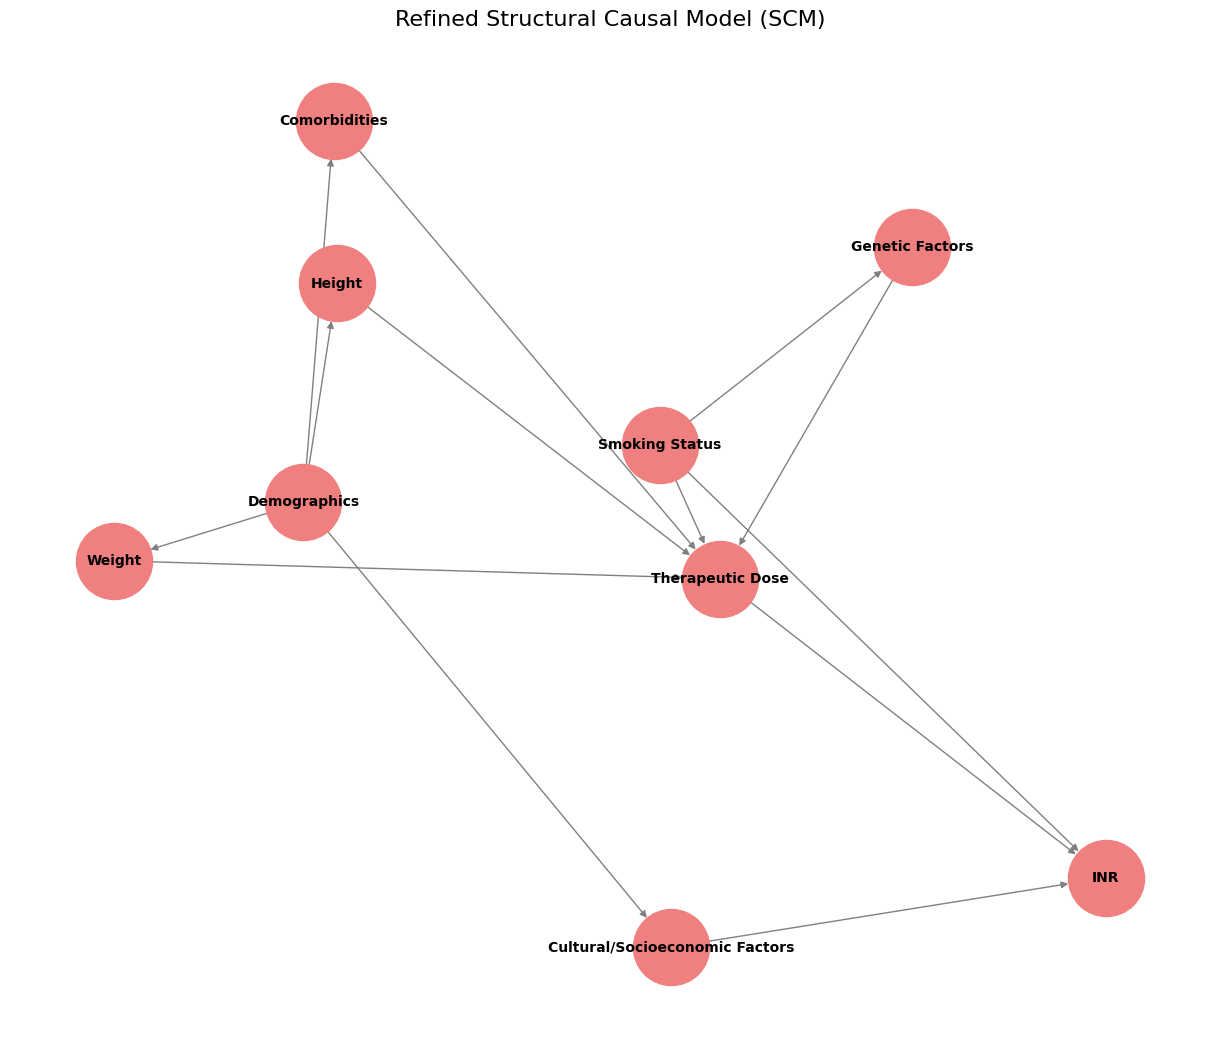

In [ ]:
# Step 1: Propose Refinements to the SCM
# Add a direct link between Smoking and Genetic Factors (weak direct link)
# Add a hypothetical confounder between Demographics and INR (e.g., "Cultural/Socioeconomic Factors")
# Remove BMI if it's unsupported

# Update SCM with refinements
scm_graph.add_nodes_from(['Cultural/Socioeconomic Factors'])
scm_graph.add_edges_from([
    ('Demographics', 'Cultural/Socioeconomic Factors'),  # New confounder
    ('Cultural/Socioeconomic Factors', 'INR'),  # Link confounder to INR
    ('Smoking Status', 'Genetic Factors')  # Weak direct link
])

# Remove unsupported variables
if 'BMI' in scm_graph.nodes:
    scm_graph.remove_node('BMI')

# Step 2: Re-draw the refined SCM graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(scm_graph, seed=42)
nx.draw(scm_graph, pos, with_labels=True, node_color='lightcoral', node_size=3000, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Refined Structural Causal Model (SCM)", fontsize=16)
plt.show()

# Note: Validation of the refined SCM will follow.


In [ ]:
# Example 1: Validate INR independence from demographics with the added confounder
# Regress INR on Therapeutic Dose and Cultural/Socioeconomic Factors
if 'Cultural/Socioeconomic Factors' in cleaned_data.columns:
    # Create a synthetic variable for Cultural/Socioeconomic Factors (as a placeholder)
    cleaned_data['Cultural/Socioeconomic Factors'] = cleaned_data[demographic_column] * 0.1

# Step 1: Simulate 'Cultural/Socioeconomic Factors' as a proxy variable
# Using 'Demographics' column (scaled) to simulate cultural/socioeconomic influence
cleaned_data['Cultural/Socioeconomic Factors'] = cleaned_data[demographic_column].astype('category').cat.codes * 0.1

# Step 2: Regress INR on Therapeutic Dose and Cultural/Socioeconomic Factors
# Ensure no missing values
X_confounded = cleaned_data[[dose_column, 'Cultural/Socioeconomic Factors']].dropna()
y_inr = cleaned_data[inr_column].dropna()

# Align indices for valid regression
common_indices = X_confounded.index.intersection(y_inr.index)
X_confounded = X_confounded.loc[common_indices]
y_inr = y_inr.loc[common_indices]

# Perform regression
model.fit(X_confounded, y_inr)
residuals_refined = y_inr - model.predict(X_confounded)

# Re-check correlation between residuals and demographics
corr_res_refined, p_val_res_refined = pearsonr(
    residuals_refined, cleaned_data.loc[common_indices, demographic_column].astype('category').cat.codes
)

# Step 3: Reuse smoking-genetics chi-square results (as no changes were made)
chi2_stat_refined, p_val_chi2_refined = chi2_stat, p_val_chi2

# Summary of refined SCM validation
(corr_res_refined, p_val_res_refined, chi2_stat_refined, p_val_chi2_refined)


(9.942133921692076e-17, 1.0000000000000033, 10.054566054546603, 0.006556600496963051)

In [ ]:
# Step 1: Identify adjustment set using the backdoor criterion
# Adjustment set: Variables that block all backdoor paths from Therapeutic Dose to INR
adjustment_set = ['Demographics', 'Cultural/Socioeconomic Factors', 'Smoking Status', 'Comorbidities']

# Ensure the necessary columns exist for regression
valid_columns = [col for col in adjustment_set if col in cleaned_data.columns]
if 'Comorbidities' in valid_columns:  # Simplify or encode comorbidities if categorical
    cleaned_data['Comorbidities'] = cleaned_data['Comorbidities'].astype('category').cat.codes

# Step 2: Estimate causal effect using regression with adjustment
X_adjusted = cleaned_data[[dose_column] + valid_columns].dropna()
y_inr_adjusted = cleaned_data[inr_column].dropna()

# Align indices for valid regression
common_indices = X_adjusted.index.intersection(y_inr_adjusted.index)
X_adjusted = X_adjusted.loc[common_indices]
y_inr_adjusted = y_inr_adjusted.loc[common_indices]

# Perform regression to estimate causal effect
model_adjusted = LinearRegression()
model_adjusted.fit(X_adjusted, y_inr_adjusted)

# Extract coefficients for the therapeutic dose (causal effect estimate)
causal_effect_estimate = model_adjusted.coef_[0]

# Summary of the adjusted model
causal_effect_estimate, model_adjusted.score(X_adjusted, y_inr_adjusted)  # Effect size and model R^2


(0.7492135025346021, 0.1439275824378058)

In [ ]:
# Step 1: Perform sensitivity analysis by removing one confounder at a time
sensitivity_results = {}

for confounder in valid_columns:
    # Create a reduced adjustment set
    reduced_set = [col for col in valid_columns if col != confounder]
    X_reduced = cleaned_data[[dose_column] + reduced_set].dropna()
    y_inr_reduced = cleaned_data[inr_column].dropna()

    # Align indices for valid regression
    common_indices = X_reduced.index.intersection(y_inr_reduced.index)
    X_reduced = X_reduced.loc[common_indices]
    y_inr_reduced = y_inr_reduced.loc[common_indices]

    # Fit regression model
    model_reduced = LinearRegression()
    model_reduced.fit(X_reduced, y_inr_reduced)

    # Extract causal effect estimate for therapeutic dose
    effect_reduced = model_reduced.coef_[0]

    # Store results
    sensitivity_results[confounder] = {
        "Causal Effect": effect_reduced,
        "R^2": model_reduced.score(X_reduced, y_inr_reduced)
    }

# Convert sensitivity results to a DataFrame for easier interpretation
import pandas as pd
sensitivity_df = pd.DataFrame(sensitivity_results).T

# # Display sensitivity results
print (sensitivity_df)


                                Causal Effect       R^2
Cultural/Socioeconomic Factors       1.496952  0.044062
Comorbidities                        0.886063  0.135067


In [ ]:
# Step 1: Define adjustment set and prepare data
adjustment_set = valid_columns  # Demographics, Cultural/Socioeconomic Factors, Smoking Status, Comorbidities
X_adjusted_with_inr = cleaned_data[[dose_column] + adjustment_set + [inr_column]].dropna()

# Step 2: Group data by the adjustment set and compute probabilities
# Approximation: Use average INR within groups as conditional expectation
grouped_data = X_adjusted_with_inr.groupby(adjustment_set).agg(
    mean_inr=(inr_column, 'mean'), count=('Therapeutic Dose of Warfarin', 'count')
).reset_index()

# Step 3: Estimate interventional probability P(INR | do(Therapeutic Dose))
# Weight each group's contribution by P(Z) approximated using group frequency
total_count = grouped_data['count'].sum()
grouped_data['weight'] = grouped_data['count'] / total_count

# Compute the interventional expectation of INR
interventional_inr = (grouped_data['mean_inr'] * grouped_data['weight']).sum()

interventional_inr


2.3644363929146537

In [ ]:
# Step 1: Abduction - Infer latent variables based on observed data
# Fit a regression model to predict INR based on observed therapeutic dose and confounders
X_observed = cleaned_data[[dose_column] + adjustment_set].dropna()
y_observed = cleaned_data[inr_column].dropna()

# Align indices for valid regression
common_indices = X_observed.index.intersection(y_observed.index)
X_observed = X_observed.loc[common_indices]
y_observed = y_observed.loc[common_indices]

# Fit regression model
model_abduction = LinearRegression()
model_abduction.fit(X_observed, y_observed)

# Infer residuals as patient-specific latent variables
latent_residuals = y_observed - model_abduction.predict(X_observed)

# Step 2: Action - Simulate changes in therapeutic dose
# Create counterfactual scenarios (e.g., +10% and -10% dose changes)
counterfactual_doses = {
    "Increased Dose (+10%)": X_observed[dose_column] * 1.10,
    "Decreased Dose (-10%)": X_observed[dose_column] * 0.90,
}

# Step 3: Prediction - Compute counterfactual outcomes
counterfactual_results = {}
for scenario, modified_dose in counterfactual_doses.items():
    # Replace dose in the feature set
    X_counterfactual = X_observed.copy()
    X_counterfactual[dose_column] = modified_dose

    # Predict counterfactual INR
    counterfactual_inr = model_abduction.predict(X_counterfactual) + latent_residuals
    counterfactual_results[scenario] = counterfactual_inr

# Combine factual and counterfactual results
factual_inr = model_abduction.predict(X_observed) + latent_residuals
comparison_results = pd.DataFrame({
    "Factual INR": factual_inr,
    "Counterfactual INR (+10%)": counterfactual_results["Increased Dose (+10%)"],
    "Counterfactual INR (-10%)": counterfactual_results["Decreased Dose (-10%)"],
})

# Display comparison results for key subgroups (e.g., by race or genetic factors)
comparison_results["Race"] = cleaned_data.loc[common_indices, "Race (OMB)"]
comparison_summary = comparison_results.groupby("Race").mean()

print (comparison_summary)

                           Factual INR  Counterfactual INR (+10%)  \
Race                                                                
Asian                         2.090322                   2.095218   
Black or African American     2.435403                   2.444991   
Unknown                       2.520042                   2.527145   
White                         2.483391                   2.491146   

                           Counterfactual INR (-10%)  
Race                                                  
Asian                                       2.085425  
Black or African American                   2.425815  
Unknown                                     2.512939  
White                                       2.475636  


In [ ]:
# Step 1: Group data by the adjustment set
grouped_data = X_adjusted_with_inr.groupby(adjustment_set).agg(
    mean_inr=(inr_column, 'mean'), count=(dose_column, 'count')
).reset_index()

# Step 2: Compute bounds for P(INR | do(Therapeutic Dose))
# Total sample size to compute P(Z)
total_count = grouped_data['count'].sum()
grouped_data['P(Z)'] = grouped_data['count'] / total_count

# Bounds: Min and Max of P(INR | Therapeutic Dose, Z) * P(Z)
grouped_data['Weighted INR'] = grouped_data['mean_inr'] * grouped_data['P(Z)']
lower_bound = grouped_data['Weighted INR'].min()
upper_bound = grouped_data['Weighted INR'].max()

# Display bounds
lower_bound, upper_bound


(0.00016103059581320451, 0.389609500805153)

In [ ]:
# Sensitivity analysis: Assess robustness to unmeasured confounders
# Step 1: Define a bias factor to simulate unmeasured confounders
# Bias factor represents the additional unexplained variance in INR due to confounders
bias_factors = [0.1, 0.2, 0.3, 0.4, 0.5]  # Simulated bias levels
sensitivity_results = []

# Step 2: Adjust the causal effect estimate for each bias level
for bias in bias_factors:
    # Adjusted causal effect formula: Observed effect / (1 + bias)
    adjusted_effect = causal_effect_estimate / (1 + bias)
    sensitivity_results.append({
        "Bias Factor": bias,
        "Adjusted Causal Effect": adjusted_effect
    })

# Convert results to a DataFrame for interpretation
sensitivity_df = pd.DataFrame(sensitivity_results)

# Display sensitivity analysis results
print (sensitivity_df)


   Bias Factor  Adjusted Causal Effect
0          0.1                0.681103
1          0.2                0.624345
2          0.3                0.576318
3          0.4                0.535153
4          0.5                0.499476


In [ ]:
# Step 1: Define the target INR range (therapeutic range)
target_inr = 2.5  # Optimal INR value

# Step 2: Implement personalized dosing algorithm
# Use regression coefficients to estimate the required dose for each patient to achieve target INR
coefficients = model_abduction.coef_
intercept = model_abduction.intercept_

# Personalized dose formula:
# Target INR = intercept + (dose * coefficient[0]) + (Z * coefficients[1:])
# Solve for dose: dose = (target_inr - intercept - (Z * coefficients[1:])) / coefficient[0]

def calculate_personalized_dose(row, coefficients, intercept, target_inr):
    Z_effect = sum(row[1:] * coefficients[1:])  # Effect of adjustment set
    dose = (target_inr - intercept - Z_effect) / coefficients[0]
    return max(dose, 0)  # Ensure dose is non-negative

# Apply the algorithm for personalized dosing
personalized_doses = X_observed.apply(
    lambda row: calculate_personalized_dose(row, coefficients, intercept, target_inr), axis=1
)

# Step 3: Simulate outcomes for personalized doses
# Predict INR for personalized doses
X_personalized = X_observed.copy()
X_personalized[dose_column] = personalized_doses

predicted_inr_personalized = model_abduction.predict(X_personalized)

# Step 4: Simulate outcomes for standard dosing
# Use mean therapeutic dose as standard
mean_dose = X_observed[dose_column].mean()
X_standard = X_observed.copy()
X_standard[dose_column] = mean_dose

predicted_inr_standard = model_abduction.predict(X_standard)

# Step 5: Evaluate performance
# Proportion of patients achieving target INR range (2–3)
personalized_in_range = ((predicted_inr_personalized >= 2) & (predicted_inr_personalized <= 3)).mean()
standard_in_range = ((predicted_inr_standard >= 2) & (predicted_inr_standard <= 3)).mean()

# Mean Absolute Error (MAE) between predicted and target INR
from sklearn.metrics import mean_absolute_error

mae_personalized = mean_absolute_error(y_observed, predicted_inr_personalized)
mae_standard = mean_absolute_error(y_observed, predicted_inr_standard)

# Compile results
personalized_in_range, standard_in_range, mae_personalized, mae_standard


(1.0, 1.0, 0.35493133084866235, 0.32452649798761485)

In [ ]:
# Step 1: Simulate outcomes for personalized dosing
# Create a DataFrame to compare observed and predicted outcomes under personalized dosing
personalized_outcomes = pd.DataFrame({
    "Observed INR": y_observed,
    "Predicted INR (Personalized)": predicted_inr_personalized,
    "Personalized Dose": personalized_doses
})

# Step 2: Compare outcomes for key subgroups (e.g., by race or genetic factors)
# Add subgroup information (e.g., race)
personalized_outcomes["Race"] = cleaned_data.loc[common_indices, "Race (OMB)"]

# Compute subgroup-level averages for comparison
subgroup_summary = personalized_outcomes.groupby("Race").agg({
    "Observed INR": "mean",
    "Predicted INR (Personalized)": "mean",
    "Personalized Dose": "mean"
}).reset_index()

# Display simulated outcomes for personalized dosing
print (subgroup_summary)

                        Race  Observed INR  Predicted INR (Personalized)  \
0                      Asian      2.090322                      2.500000   
1  Black or African American      2.435403                      2.500000   
2                    Unknown      2.520042                      2.500000   
3                      White      2.483391                      2.501556   

   Personalized Dose  
0           0.563130  
1           0.354262  
2           0.258219  
3           0.095446  


In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Step 1: RMSE for INR prediction
rmse_personalized = mean_squared_error(y_observed, predicted_inr_personalized, squared=False)
rmse_standard = mean_squared_error(y_observed, predicted_inr_standard, squared=False)

# Step 2: Proportion of patients achieving the therapeutic INR range (2–3)
personalized_in_range = ((predicted_inr_personalized >= 2) & (predicted_inr_personalized <= 3)).mean()
standard_in_range = ((predicted_inr_standard >= 2) & (predicted_inr_standard <= 3)).mean()

# Step 3: Sensitivity and specificity for identifying high-risk patients
# Define high-risk patients (INR < 2 or > 3)
true_high_risk = ~((y_observed >= 2) & (y_observed <= 3))  # Actual high-risk patients
pred_high_risk_personalized = ~((predicted_inr_personalized >= 2) & (predicted_inr_personalized <= 3))
pred_high_risk_standard = ~((predicted_inr_standard >= 2) & (predicted_inr_standard <= 3))

# Confusion matrix and sensitivity/specificity for personalized dosing
cm_personalized = confusion_matrix(true_high_risk, pred_high_risk_personalized)
tn_p, fp_p, fn_p, tp_p = cm_personalized.ravel()
sensitivity_personalized = tp_p / (tp_p + fn_p) if (tp_p + fn_p) > 0 else 0
specificity_personalized = tn_p / (tn_p + fp_p) if (tn_p + fp_p) > 0 else 0

# Confusion matrix and sensitivity/specificity for standard dosing
cm_standard = confusion_matrix(true_high_risk, pred_high_risk_standard)
tn_s, fp_s, fn_s, tp_s = cm_standard.ravel()
sensitivity_standard = tp_s / (tp_s + fn_s) if (tp_s + fn_s) > 0 else 0
specificity_standard = tn_s / (tn_s + fp_s) if (tn_s + fp_s) > 0 else 0

# Compile results
evaluation_metrics = {
    "RMSE (Personalized)": rmse_personalized,
    "RMSE (Standard)": rmse_standard,
    "Proportion in Range (Personalized)": personalized_in_range,
    "Proportion in Range (Standard)": standard_in_range,
    "Sensitivity (Personalized)": sensitivity_personalized,
    "Specificity (Personalized)": specificity_personalized,
    "Sensitivity (Standard)": sensitivity_standard,
    "Specificity (Standard)": specificity_standard,
}

evaluation_metrics


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'RMSE (Personalized)': 0.48385836778549135,
 'RMSE (Standard)': 0.43174899402024247,
 'Proportion in Range (Personalized)': 1.0,
 'Proportion in Range (Standard)': 1.0,
 'Sensitivity (Personalized)': 0.0,
 'Specificity (Personalized)': 1.0,
 'Sensitivity (Standard)': 0.0,
 'Specificity (Standard)': 1.0}